<a href="https://colab.research.google.com/github/musicangora/MakeDataset_IXI/blob/main/MakeDatasets_IXI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 参考
- [h5pyのかんたんな使い方](https://www.qoosky.io/techs/861b4ae419)
- [NRRDファイルの読み込み](https://qiita.com/tatsunidas/items/32d3d0b362b0864b8579)
- [kaggle pix2pix](https://www.kaggle.com/vikramtiwari/pix2pix-dataset)
- [[Linux]ファイルの圧縮、解凍方法](https://qiita.com/supersaiakujin/items/c6b54e9add21d375161f)
- [【メモ】Linux圧縮/解凍コマンド
Linux](https://qiita.com/t-kubo0325/items/158e02aa6b8e62b76242)
- [Example on BRATS2018](https://colab.research.google.com/github/IAmSuyogJadhav/3d-mri-brain-tumor-segmentation-using-autoencoder-regularization/blob/master/Example_on_BRATS2018.ipynb)


## データセット入手先
[IXI Dataset - Brain Development](https://brain-development.org/ixi-dataset/)
- T2とPDをダウンロード

In [ ]:
# .tarをルートに展開
# tar -option[c:新規ファイルを作る c:進捗を表示 f:ファイル名の指定 x:解凍 z:.gz j:.bz2 J:.xz]
!tar -xvf "/content/drive/My Drive/IXI_Datasets/IXI-T2.tar"
!tar -xvf "/content/drive/My Drive/IXI_Datasets/IXI-PD.tar"

IXI002-Guys-0828-T2.nii.gz
IXI012-HH-1211-T2.nii.gz
IXI013-HH-1212-T2.nii.gz
IXI014-HH-1236-T2.nii.gz
IXI015-HH-1258-T2.nii.gz
IXI016-Guys-0697-T2.nii.gz
IXI017-Guys-0698-T2.nii.gz
IXI019-Guys-0702-T2.nii.gz
IXI020-Guys-0700-T2.nii.gz
IXI021-Guys-0703-T2.nii.gz
IXI022-Guys-0701-T2.nii.gz
IXI023-Guys-0699-T2.nii.gz
IXI024-Guys-0705-T2.nii.gz
IXI025-Guys-0852-T2.nii.gz
IXI026-Guys-0696-T2.nii.gz
IXI027-Guys-0710-T2.nii.gz
IXI028-Guys-1038-T2.nii.gz
IXI029-Guys-0829-T2.nii.gz
IXI030-Guys-0708-T2.nii.gz
IXI031-Guys-0797-T2.nii.gz
IXI033-HH-1259-T2.nii.gz
IXI034-HH-1260-T2.nii.gz
IXI035-IOP-0873-T2.nii.gz
IXI036-Guys-0736-T2.nii.gz
IXI037-Guys-0704-T2.nii.gz
IXI038-Guys-0729-T2.nii.gz
IXI039-HH-1261-T2.nii.gz
IXI040-Guys-0724-T2.nii.gz
IXI041-Guys-0706-T2.nii.gz
IXI042-Guys-0725-T2.nii.gz
IXI043-Guys-0714-T2.nii.gz
IXI044-Guys-0712-T2.nii.gz
IXI045-Guys-0713-T2.nii.gz
IXI046-Guys-0824-T2.nii.gz
IXI048-HH-1326-T2.nii.gz
IXI049-HH-1358-T2.nii.gz
IXI050-Guys-0711-T2.nii.gz
IXI051-HH-1328-T2.ni

In [ ]:
# .gzをルートに展開
!gunzip -kv "/content/IXI002-Guys-0828-T2.nii.gz"
!gunzip -kv "/content/IXI002-Guys-0828-PD.nii.gz"

!gunzip -kz "/content/IXI425-IOP-0988-T2.nii.gz"
!gunzip -kz "/content/IXI425-IOP-0988-PD.nii.gz"

!gunzip -kz "/content/IXI012-HH-1211-T2.nii.gz"
!gunzip -kz "/content/IXI012-HH-1211-PD.nii.gz"

!gunzip -kz "/content/IXI013-HH-1212-T2.nii.gz"
!gunzip -kz "/content/IXI013-HH-1212-PD.nii.gz"

gzip: /content/IXI002-Guys-0828-T2.nii already exists; do you wish to overwrite (y or n)? y
/content/IXI002-Guys-0828-T2.nii.gz:	 65.2% -- replaced with /content/IXI002-Guys-0828-T2.nii
gzip: /content/IXI002-Guys-0828-PD.nii already exists; do you wish to overwrite (y or n)? y
/content/IXI002-Guys-0828-PD.nii.gz:	 62.7% -- replaced with /content/IXI002-Guys-0828-PD.nii
gzip: invalid option -- 'z'
Try `gzip --help' for more information.
gzip: invalid option -- 'z'
Try `gzip --help' for more information.
gzip: invalid option -- 'z'
Try `gzip --help' for more information.
gzip: invalid option -- 'z'
Try `gzip --help' for more information.
gzip: invalid option -- 'z'
Try `gzip --help' for more information.
gzip: invalid option -- 'z'
Try `gzip --help' for more information.


In [ ]:
!pip install simpleitk

## Pix2Pix用のデータセットの構築
### Pix2Pixのデータセットの構成例
- facades
    - facades
        - test(100files)
        - train(400files)
        - val(100files)

In [ ]:
# ------------------
# データの読み込み
# ------------------
import numpy as np
import SimpleITK as sitk
# from PIL import Image
import matplotlib.pyplot as plt
import h5py

# .niiファイルを読み込み、ndarrayに変換
IXI002_T2_nd = sitk.GetArrayFromImage(sitk.ReadImage('/content/IXI002-Guys-0828-T2.nii'))
IXI002_PD_nd = sitk.GetArrayFromImage(sitk.ReadImage('/content/IXI002-Guys-0828-PD.nii'))

IXI425_T2_nd = sitk.GetArrayFromImage(sitk.ReadImage('/content/IXI425-IOP-0988-T2.nii'))
IXI425_PD_nd = sitk.GetArrayFromImage(sitk.ReadImage('/content/IXI425-IOP-0988-PD.nii'))

IXI012_T2_nd = sitk.GetArrayFromImage(sitk.ReadImage('/content/IXI012-HH-1211-T2.nii'))
IXI012_PD_nd = sitk.GetArrayFromImage(sitk.ReadImage('/content/IXI012-HH-1211-PD.nii'))

IXI013_T2_nd = sitk.GetArrayFromImage(sitk.ReadImage('/content/IXI013-HH-1212-T2.nii'))
IXI013_PD_nd = sitk.GetArrayFromImage(sitk.ReadImage('/content/IXI013-HH-1212-PD.nii'))

# 形状の表示
print("002 T2 shape: ", IXI002_T2_nd.shape)
print("002 PD shape: ", IXI002_PD_nd.shape)

print("425 T2 shape: ", IXI425_T2_nd.shape)
print("425 PD shape: ", IXI425_PD_nd.shape)

print("012 T2 shape: ", IXI012_T2_nd.shape)
print("012 PD shape: ", IXI012_PD_nd.shape)

print("013 T2 shape: ", IXI013_T2_nd.shape)
print("013 PD shape: ", IXI013_PD_nd.shape)


002 T2 shape:  (130, 256, 256)
002 PD shape:  (130, 256, 256)
425 T2 shape:  (136, 256, 256)
425 PD shape:  (136, 256, 256)
012 T2 shape:  (112, 256, 256)
012 PD shape:  (112, 256, 256)
013 T2 shape:  (116, 256, 256)
013 PD shape:  (116, 256, 256)


In [ ]:
# -------------
# 画像の結合
# -------------
def joint_imgs(t2_nd, pd_nd):
    t2pd_imgs = np.empty((0, 256, 512))  # 結合後のサイズは256x512
    for i in range(t2_nd.shape[0]):
        t2pd = np.concatenate( (t2_nd[i], pd_nd[i]), axis=1 )  # 2次元画像を2次元のまま横にくっつける
        t2pd = t2pd[np.newaxis]  # 2次元画像を3次元テンソルへ
        t2pd_imgs = np.append(t2pd_imgs, t2pd, axis=0)  # 3次元どうしになったのでappendで結合できる
    return t2pd_imgs

# 訓練データの生成
tmp = np.append( joint_imgs(IXI002_T2_nd, IXI002_PD_nd), joint_imgs(IXI012_T2_nd, IXI012_PD_nd), 0 )  # すでに3次元になってるので結合はappendでいい
train_data = np.append( tmp, joint_imgs(IXI013_T2_nd, IXI013_PD_nd), 0 )
print(train_data.shape)


(358, 256, 512)


### ファイルの構成
P2P_IXIDatasets.h5
- T2PD
    - test(136files)
    - train(358files)

In [ ]:
# -------------
# h5ファイルの保存
# -------------
with h5py.File('/content/P2P_IXIDatasets.h5', 'w') as h5:
    group = h5.create_group('/T2PD')
    test_datasets = group.create_dataset(
        name='test',
        data=joint_imgs(IXI425_T2_nd, IXI425_PD_nd)
    )
    train_datasets = group.create_dataset(
        name='train',
        data=train_data
    )

(136, 256, 512)
(358, 256, 512)


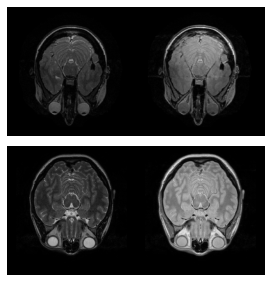

In [ ]:
# h5ファイルの確認
f = h5py.File('/content/P2P_IXIDatasets.h5', 'r')
test = f['/T2PD/test']
train = f['/T2PD/train']
print(test.shape)
print(train.shape)


plt.figure(figsize=(4, 4))
plt.subplot(2, 1, 1)
plt.axis('off')
plt.imshow(test[50], cmap='gray')

plt.subplot(2, 1, 2)
plt.axis('off')
plt.imshow(train[50], cmap='gray')

plt.tight_layout(True)

In [ ]:
# ---------------------------
# h5ファイルをドライブへ保存
# ---------------------------
!cp -r /content/P2P_IXIDatasets.h5 '/content/drive/My Drive/'

## CycleGAN用データセットの構築
### CycleGANのデータセットの構成
- datasets
    - trainA
    - trainB
    - testA
    - testB
    


In [ ]:
# -------------------
# 訓練データの生成
# -------------------

# trainT2
tmpA = np.append(IXI002_T2_nd, IXI012_T2_nd, 0)
train_T2 = np.append(tmpA, IXI013_T2_nd, 0 )
print(train_T2.shape)

#trainPD
tmpB = np.append(IXI002_PD_nd, IXI012_PD_nd, 0)
train_PD = np.append(tmpB, IXI013_PD_nd, 0 )
print(train_PD.shape)

(358, 256, 256)
(358, 256, 256)


### ファイルの構成
CycG_IXIDatasaet.h5
- T2PD
    - trainA(358files)
    - testA(136files)
    - trainB(358files)
    - testB(136files)

In [ ]:
# -------------
# h5ファイルの保存
# -------------
with h5py.File('/content/CycG_IXIDatasets.h5', 'w') as h5:
    group = h5.create_group('/T2PD')
    testT2_datasets = group.create_dataset(
        name='testA',
        data=IXI425_T2_nd
    )
    trainT2_datasets = group.create_dataset(
        name='trainA',
        data=train_T2
    )

    testPD_datasets = group.create_dataset(
        name='testB',
        data=IXI425_PD_nd
    )
    trainPD_datasets = group.create_dataset(
        name='trainB',
        data=train_PD
    )

int16
(358, 256, 256)


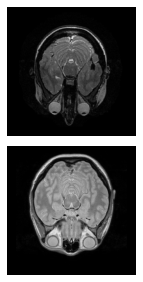

In [ ]:
# h5ファイルの確認
f = h5py.File('/content/CycG_IXIDatasets.h5', 'r')
test = f['/T2PD/testA']
train = f['/T2PD/trainB']
print(test[0].dtype)
print(train.shape)


plt.figure(figsize=(4, 4))
plt.subplot(2, 1, 1)
plt.axis('off')
plt.imshow(test[50], cmap='gray')

plt.subplot(2, 1, 2)
plt.axis('off')
plt.imshow(train[50], cmap='gray')

plt.tight_layout(True)

In [ ]:
# h5ファイルの保存
!cp -r /content/CycG_IXIDatasets.h5 '/content/drive/My Drive/'

0
uint16


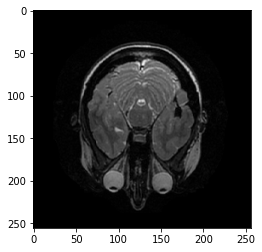

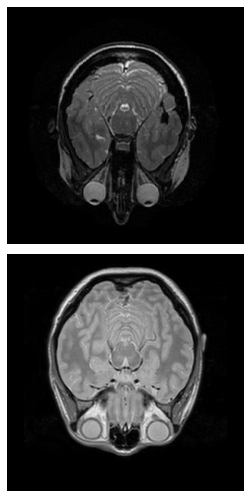

In [ ]:
# 検証用
from PIL import Image
# h5ファイルの確認
f = h5py.File('/content/CycG_IXIDatasets2.h5', 'r')
test = f['/T2PD/testA']
train = f['/T2PD/trainB']
print(test[0].min())

# どうやらMRIのデータセットはuint16で保存後、matplotlibで表示すればよしなにしてくれるらしい？
Image.fromarray(test[50].astype(np.uint16)).save('/content/drive/My Drive/'+str(50)+'.tif')

#画像の読み込み
im = Image.open("/content/drive/My Drive/50.tif")

#画像をarrayに変換
im_list = np.asarray(im)
print(im_list.dtype)
#貼り付け
plt.imshow(im_list, cmap='gray')
#表示
plt.show()

plt.figure(figsize=(7, 7))
plt.subplot(2, 1, 1)
plt.axis('off')
plt.imshow(test[50], cmap='gray')

plt.subplot(2, 1, 2)
plt.axis('off')
plt.imshow(train[50], cmap='gray')

plt.tight_layout(True)